In [1]:
import pandas as pd
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt  
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score,roc_curve # ROC a diferencia del accuracy te da un valor justo de precision para datos desbalanceados

In [2]:
test = 2
bearing = 1
data_type = 'feature'
df = pd.read_csv((f'nasa_bearing_dataset/target_test{test}_bearing_{0}_{data_type}.csv'), index_col=False)

In [3]:
df.drop(columns='Unnamed: 0',inplace=True)

In [4]:
df.head()

,max,min,mean,std,rms,skewness,kurtosis,crest_factor,form_factor,fault
0,0.454,-0.386,-0.010194,0.073478,0.074180,0.083917,0.628317,6.120246,-7.276759,Normal
1,0.369,-0.388,-0.002581,0.075339,0.075382,0.052047,0.648122,4.895081,-29.208250,Normal
2,0.503,-0.400,-0.002490,0.076189,0.076228,0.032865,0.513496,6.598658,-30.618731,Normal
3,0.608,-0.576,-0.002278,0.078694,0.078726,0.041517,1.157370,7.723037,-34.565835,Normal
4,0.391,-0.391,-0.002401,0.078440,0.078475,0.028130,0.602855,4.982488,-32.687613,Normal


In [5]:
df['fault'].unique()

array(['Normal', 'Outer Race'], dtype=object)

In [6]:
encoder = LabelEncoder()
df['fault'] = encoder.fit_transform(df['fault'])

In [7]:
df.head()

,max,min,mean,std,rms,skewness,kurtosis,crest_factor,form_factor,fault
0,0.454,-0.386,-0.010194,0.073478,0.074180,0.083917,0.628317,6.120246,-7.276759,0
1,0.369,-0.388,-0.002581,0.075339,0.075382,0.052047,0.648122,4.895081,-29.208250,0
2,0.503,-0.400,-0.002490,0.076189,0.076228,0.032865,0.513496,6.598658,-30.618731,0
3,0.608,-0.576,-0.002278,0.078694,0.078726,0.041517,1.157370,7.723037,-34.565835,0
4,0.391,-0.391,-0.002401,0.078440,0.078475,0.028130,0.602855,4.982488,-32.687613,0


In [8]:
df.isna().sum().sum()

np.int64(0)

In [9]:
df.shape

(982, 10)

In [10]:
# Standardize the features
X = df.drop("fault", axis=1) 
y = df["fault"]
# Standardize the features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# X = pd.DataFrame(X_scaled, columns=X.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(785, 9)
(197, 9)
(785,)
(197,)


In [12]:
pd.DataFrame(y_train).groupby('fault').agg({'fault':['count']})

,fault
,count
fault,
0,425
1,360


In [13]:
def apply_classifier(clf,xTrain,xTest,yTrain,yTest):

    clf.fit(xTrain, yTrain) #Entrenamiento del modelo
    predictions = clf.predict(xTest) #Validación sobre la data de testing
    conf_mtx = confusion_matrix(yTest,predictions) #Matriz de confusión de la data de testing real con la predicha

    f, axes = plt.subplots(ncols=2, figsize=(15, 5)) #Definición del área de visualización (2 gráficas)

    sns.heatmap(conf_mtx,annot=True,cbar = False,fmt = "g",ax = axes[0])#definición del formato de la matriz de confusión
    axes[0].set_xlabel('Predicted labels') #Titulo del eje x de la matriz de confusión
    axes[0].set_ylabel('True labels') #Titulo del eje y de la matriz de confusión
    axes[0].set_title('Confusion Matrix Test'); #Titulo de la matriz de confusión
    axes[0].xaxis.set_ticklabels(['Normal', 'Outer Race']); #distribución de los resultados en la matriz de confusión del eje x
    axes[0].yaxis.set_ticklabels(['Normal', 'Outer Race']); #distribución de los resultados en la matriz de confusión del eje y

    print(classification_report(yTest,predictions)) #mostrar resultados

    roc_auc = roc_auc_score(yTest,predictions) #definición del cálculo del auc
    print ("AUC ROC : ",roc_auc) #mostrar el resultado

    fpr, tpr,_ = roc_curve(yTest, predictions) #Función para armar la curva ROC
    #fpr : false positive rate
    #tpr : true positive rate
    axes[1].plot(fpr,tpr,label= "auc="+str(roc_auc)); #código para mostrar el resultado del auc en la gráfica
    axes[1].plot([0, 1], [0, 1]) #código del formato de la gráfica
    plt.xlabel('False Positive Rate') #título del eje x
    plt.ylabel('True Positive Rate') #título del eje y
    plt.title('ROC') #título del gráfico

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       111
           1       0.99      1.00      0.99        86

    accuracy                           0.99       197
   macro avg       0.99      1.00      0.99       197
weighted avg       0.99      0.99      0.99       197

AUC ROC :  0.9954954954954954


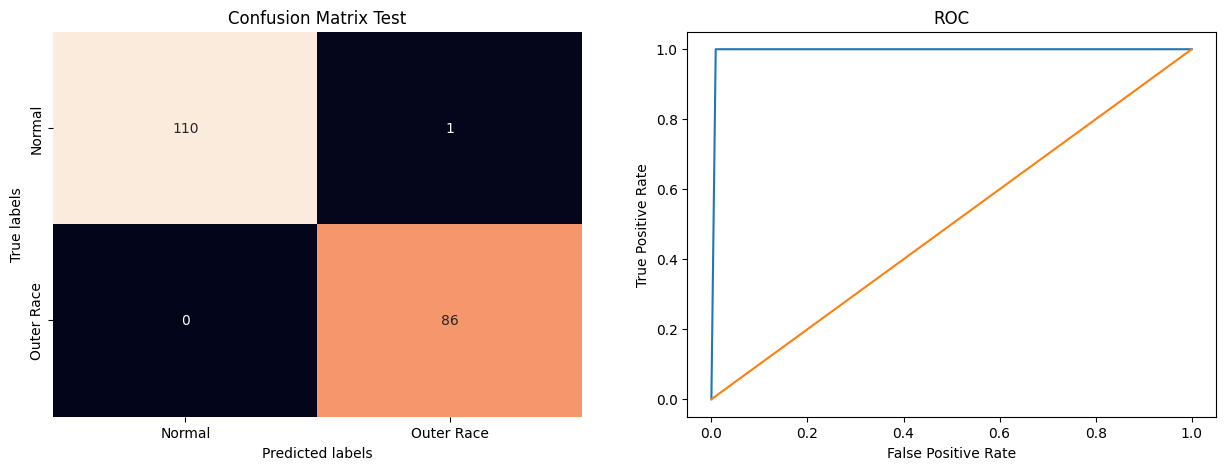

In [14]:
decision_tree = DecisionTreeClassifier() # Definir nuestro modelo
apply_classifier(decision_tree,X_train, X_test, y_train, y_test) # Aplicar la funcion que hemos construido

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       111
           1       0.99      0.83      0.90        86

    accuracy                           0.92       197
   macro avg       0.93      0.91      0.92       197
weighted avg       0.93      0.92      0.92       197

AUC ROC :  0.9082861931699141


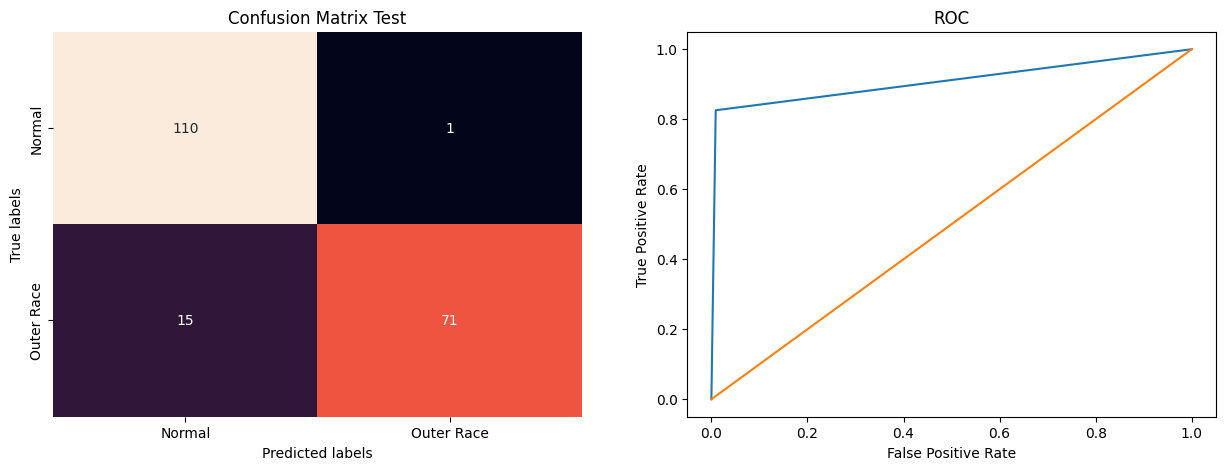

In [15]:
logistic_reg = LogisticRegression()
apply_classifier(logistic_reg,X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       111
           1       0.98      1.00      0.99        86

    accuracy                           0.99       197
   macro avg       0.99      0.99      0.99       197
weighted avg       0.99      0.99      0.99       197

AUC ROC :  0.990990990990991


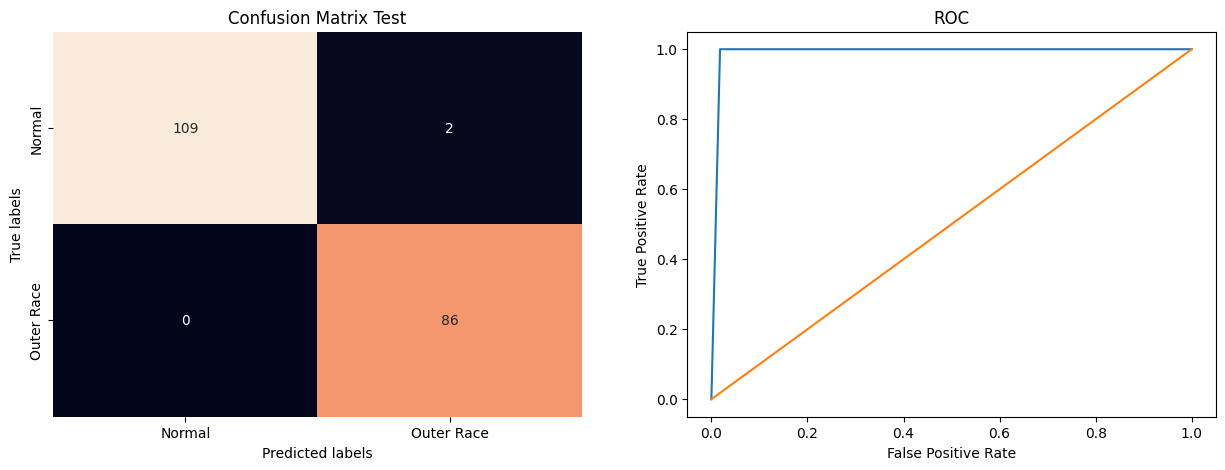

In [16]:
random_forest = RandomForestClassifier(random_state = 42)
apply_classifier(random_forest,X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       111
           1       0.99      1.00      0.99        86

    accuracy                           0.99       197
   macro avg       0.99      1.00      0.99       197
weighted avg       0.99      0.99      0.99       197

AUC ROC :  0.9954954954954954


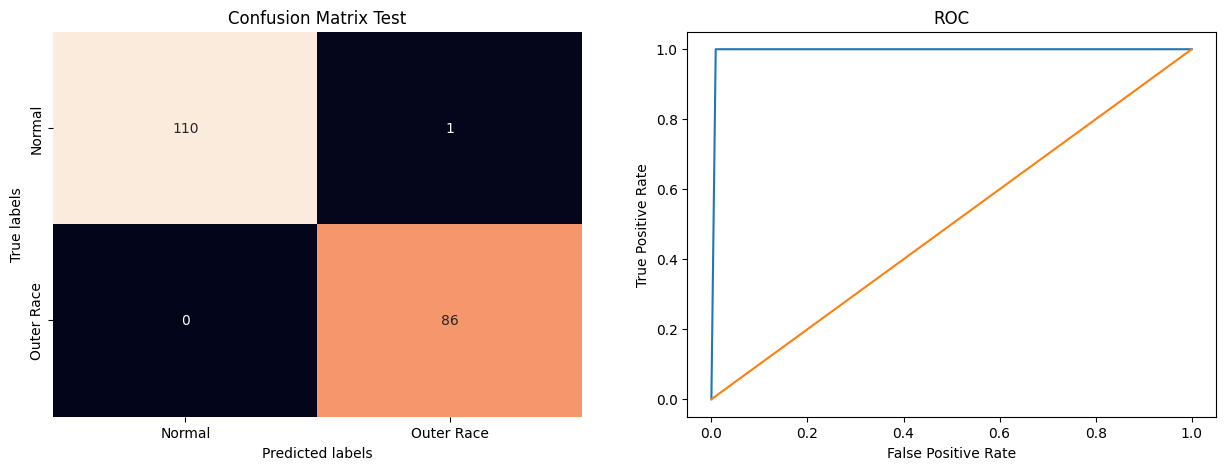

In [17]:
xg_boost = XGBClassifier()
apply_classifier(xg_boost,X_train, X_test, y_train, y_test)